In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib

import os
import sys

%matplotlib widget

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools







In [3]:
data = pd.read_csv("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/oscillo/L128Z201.csv")

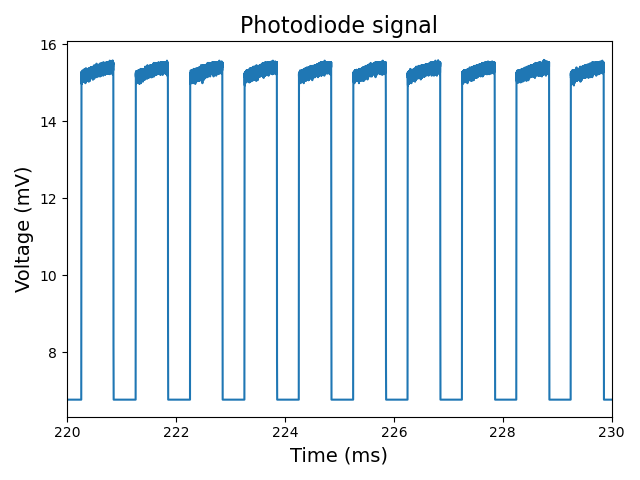

In [13]:
time = np.asarray(data.iloc[:,0])
signal = np.asarray(data.iloc[:,1])

fig, ax = plt.subplots()
ax.plot((np.asarray(data.iloc[:,0]) - data.iloc[:,0][0])*1000,np.asarray(data.iloc[:,1]))
ax.set_xlabel('Time (ms)', fontsize = 14)
ax.set_ylabel('Voltage (mV)', fontsize = 14)
ax.set_title('Photodiode signal', fontsize = 16)
ax.set_xlim([220,230])

fig.tight_layout()


In [5]:
importlib.reload(tools)

def moving_average(signal, window_size):
    cumsum = np.cumsum(signal, dtype=float)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

time_window = 10 # in milliseconds

window_size = int((time_window/1000)/(time[1]-time[0]))

signal_filtered = moving_average(signal, window_size)
time_filtered = moving_average(time, window_size)
time_filtered = time_filtered - time_filtered[0]


F, A, P = tools.FFT(time_filtered, signal_filtered)

popt, xfit, yfit = tools.sinus_fit(time_filtered, signal_filtered, time_filtered[0], time_filtered[-1], len(time_filtered), p0 = [ 2.6,  1,  0.8, 11])



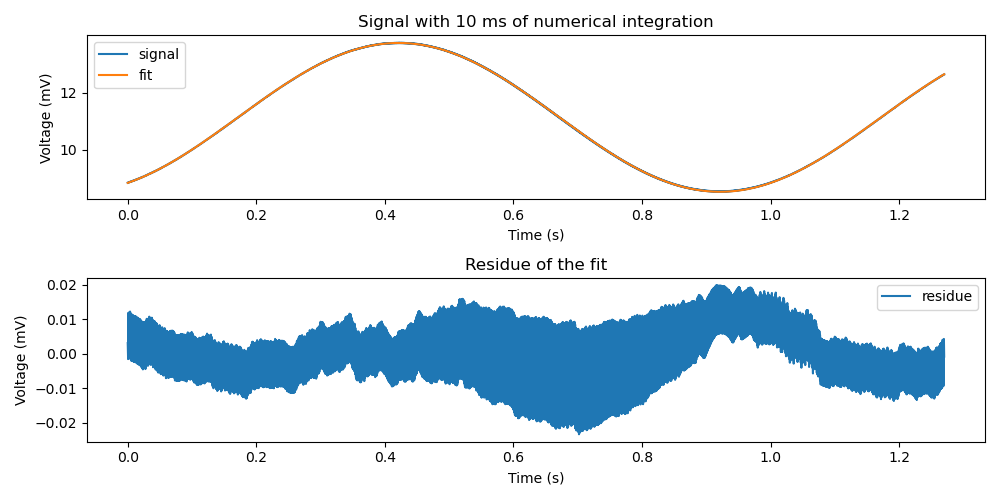

In [6]:
residue = signal_filtered - yfit

figure, ax = plt.subplots(2,1, figsize=(10,5))
ax[0].plot(time_filtered, signal_filtered, label='signal')
ax[0].plot(xfit, yfit, label='fit')
ax[1].plot(time_filtered, residue, label='residue')

ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Voltage (mV)')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Voltage (mV)')
ax[0].legend()
ax[1].legend()
ax[0].set_title('Signal with 10 ms of numerical integration')
ax[1].set_title('Residue of the fit')


figure.tight_layout()


In [23]:
calib = pd.read_csv("C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PWM_calib.csv", sep = ';')

(0.0, 1400.0)

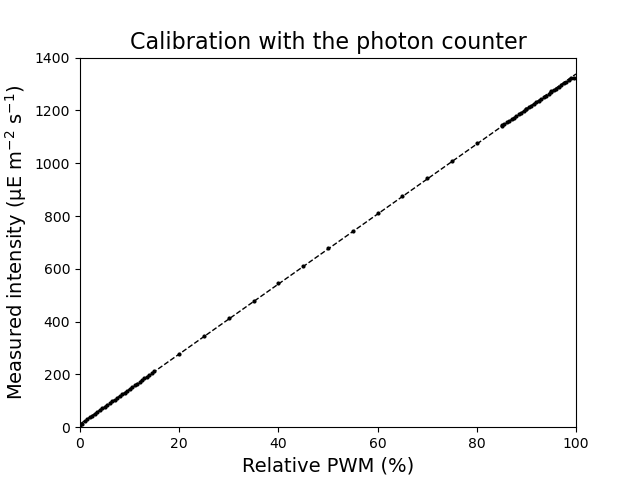

In [28]:
fig, ax = plt.subplots()
ax.plot(calib.iloc[:,0]*100, calib.iloc[:,1], 'o', color = 'black',markersize=2)
popt, xfit, yfit = tools.lin_fit(calib.iloc[:,0], calib.iloc[:,1], 0, 1, 100)
ax.plot(xfit*100, yfit, '--', color = 'black', linewidth=1)
ax.set_xlabel('Relative PWM (%)', fontsize = 14)
ax.set_ylabel('Measured intensity (µE m$^{-2}$ s$^{-1}$)', fontsize = 14)
ax.set_title('Calibration with the photon counter', fontsize = 16)
ax.set_xlim([0,100])
ax.set_ylim([0,1400])
